# House Price Prediction Model

## Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Loading Dataset

In [267]:
df = pd.read_csv(r'../data/housing.csv')

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Data Preprocessing

In [268]:
df.dropna(inplace=True)

In [269]:
from joblib import dump
with open('../data/ocean_proximity_unique_values.joblib', 'wb') as f:
    dump(df.ocean_proximity.unique(), f)

In [14]:
df = pd.get_dummies(df, columns=['ocean_proximity'], dtype=int)

In [15]:
df['rooms_per_house'] = df['total_rooms'] / df['households']
df['bedrooms_per_house'] = df['total_bedrooms'] / df['households']

In [16]:
df.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1, inplace=True)

In [17]:
house_value = df.pop('median_house_value')
df.insert(len(df.columns), 'median_house_value', house_value)

In [37]:
df.describe()

,longitude,latitude,housing_median_age,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_house,bedrooms_per_house,median_house_value
count,20391.000000,20391.000000,20391.000000,20391.000000,20391.000000,20391.000000,20391.000000,20391.000000,20391.000000,20391.000000,20391.000000,20391.000000
mean,-119.570927,35.628925,28.655191,3.872015,0.443039,0.316561,0.000245,0.111324,0.128831,5.358839,1.081944,206939.681869
std,2.004364,2.134603,12.589720,1.900343,0.496757,0.465146,0.015658,0.314540,0.335021,1.552430,0.231382,115458.808950
min,-124.350000,32.540000,1.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000,0.846154,0.333333,14999.000000
25%,-121.800000,33.930000,18.000000,2.563100,0.000000,0.000000,0.000000,0.000000,0.000000,4.440000,1.005894,119600.000000
50%,-118.490000,34.250000,29.000000,3.537500,0.000000,0.000000,0.000000,0.000000,0.000000,5.227666,1.048780,179800.000000
75%,-118.010000,37.710000,37.000000,4.744800,1.000000,1.000000,0.000000,0.000000,0.000000,6.046648,1.099171,264950.000000
max,-114.310000,41.950000,52.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000,24.900000,6.000000,500001.000000


### Data Visualization

In [19]:
corr_matrix = df.corr()

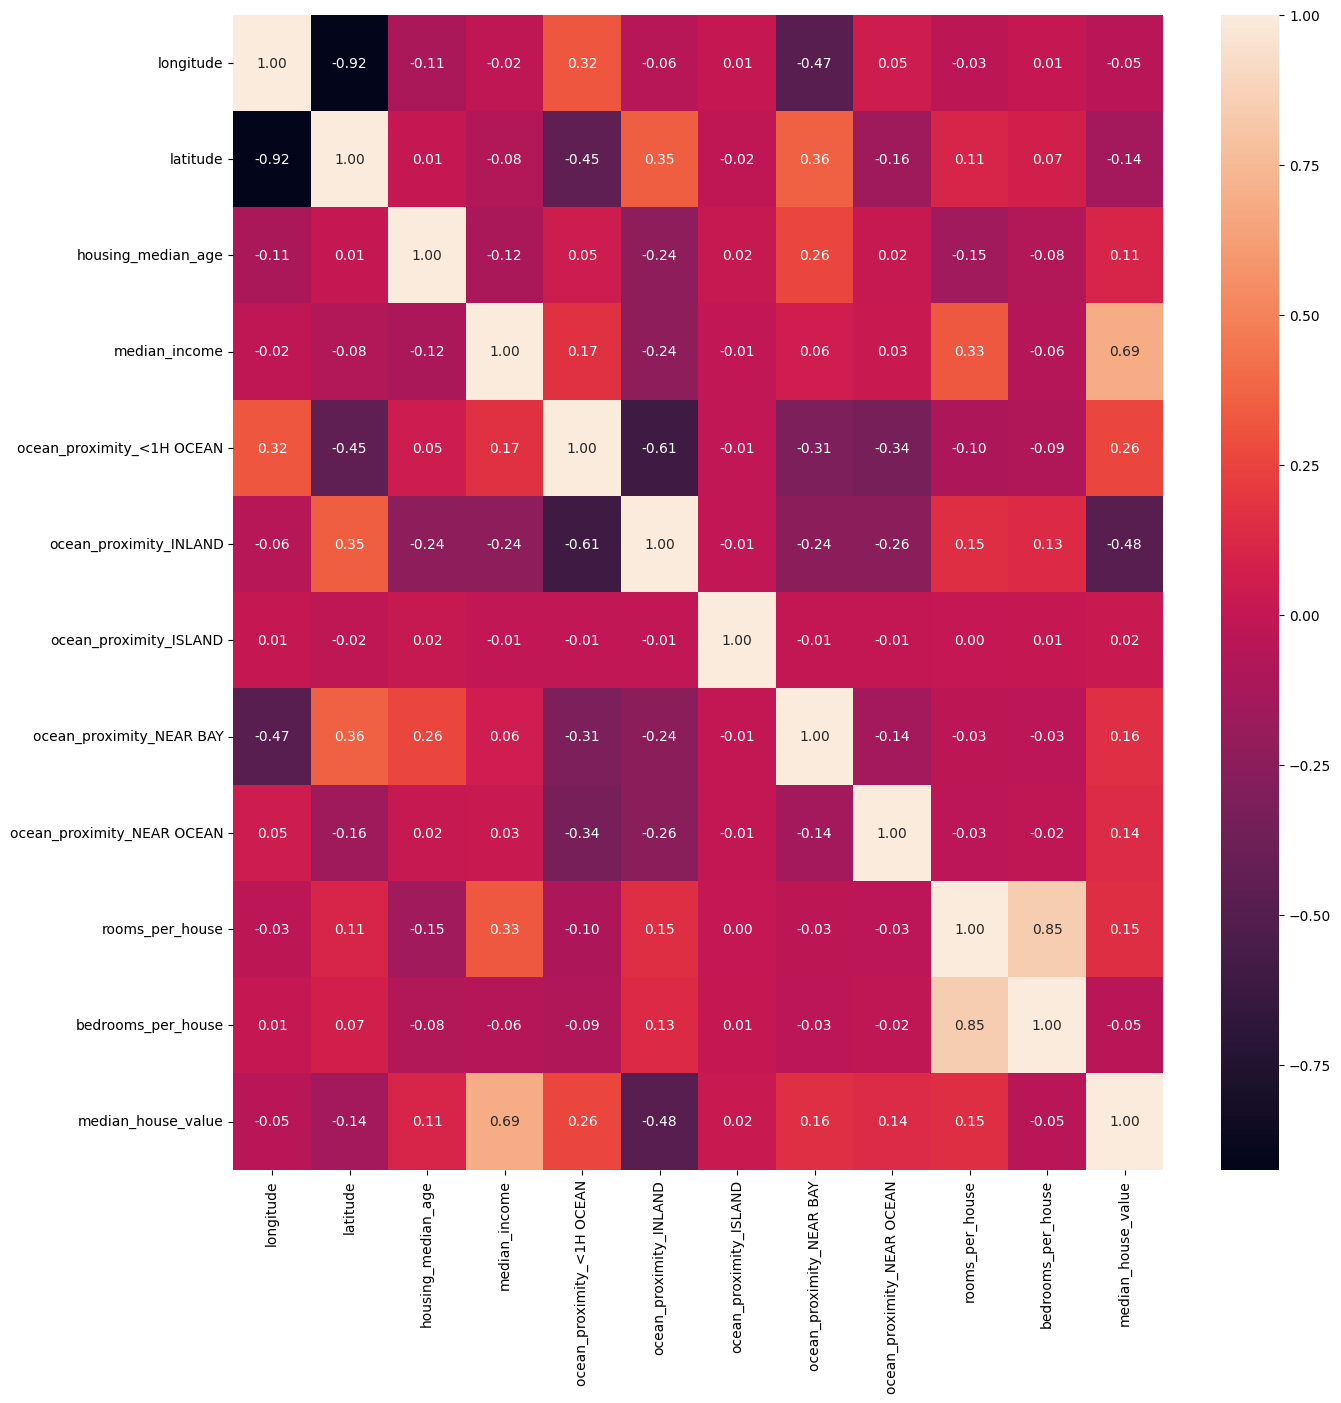

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cbar = True, annot=True, fmt='.2f')
plt.savefig('../reports/Correlation_Matrix.png')

In [22]:
len(df.columns)

12

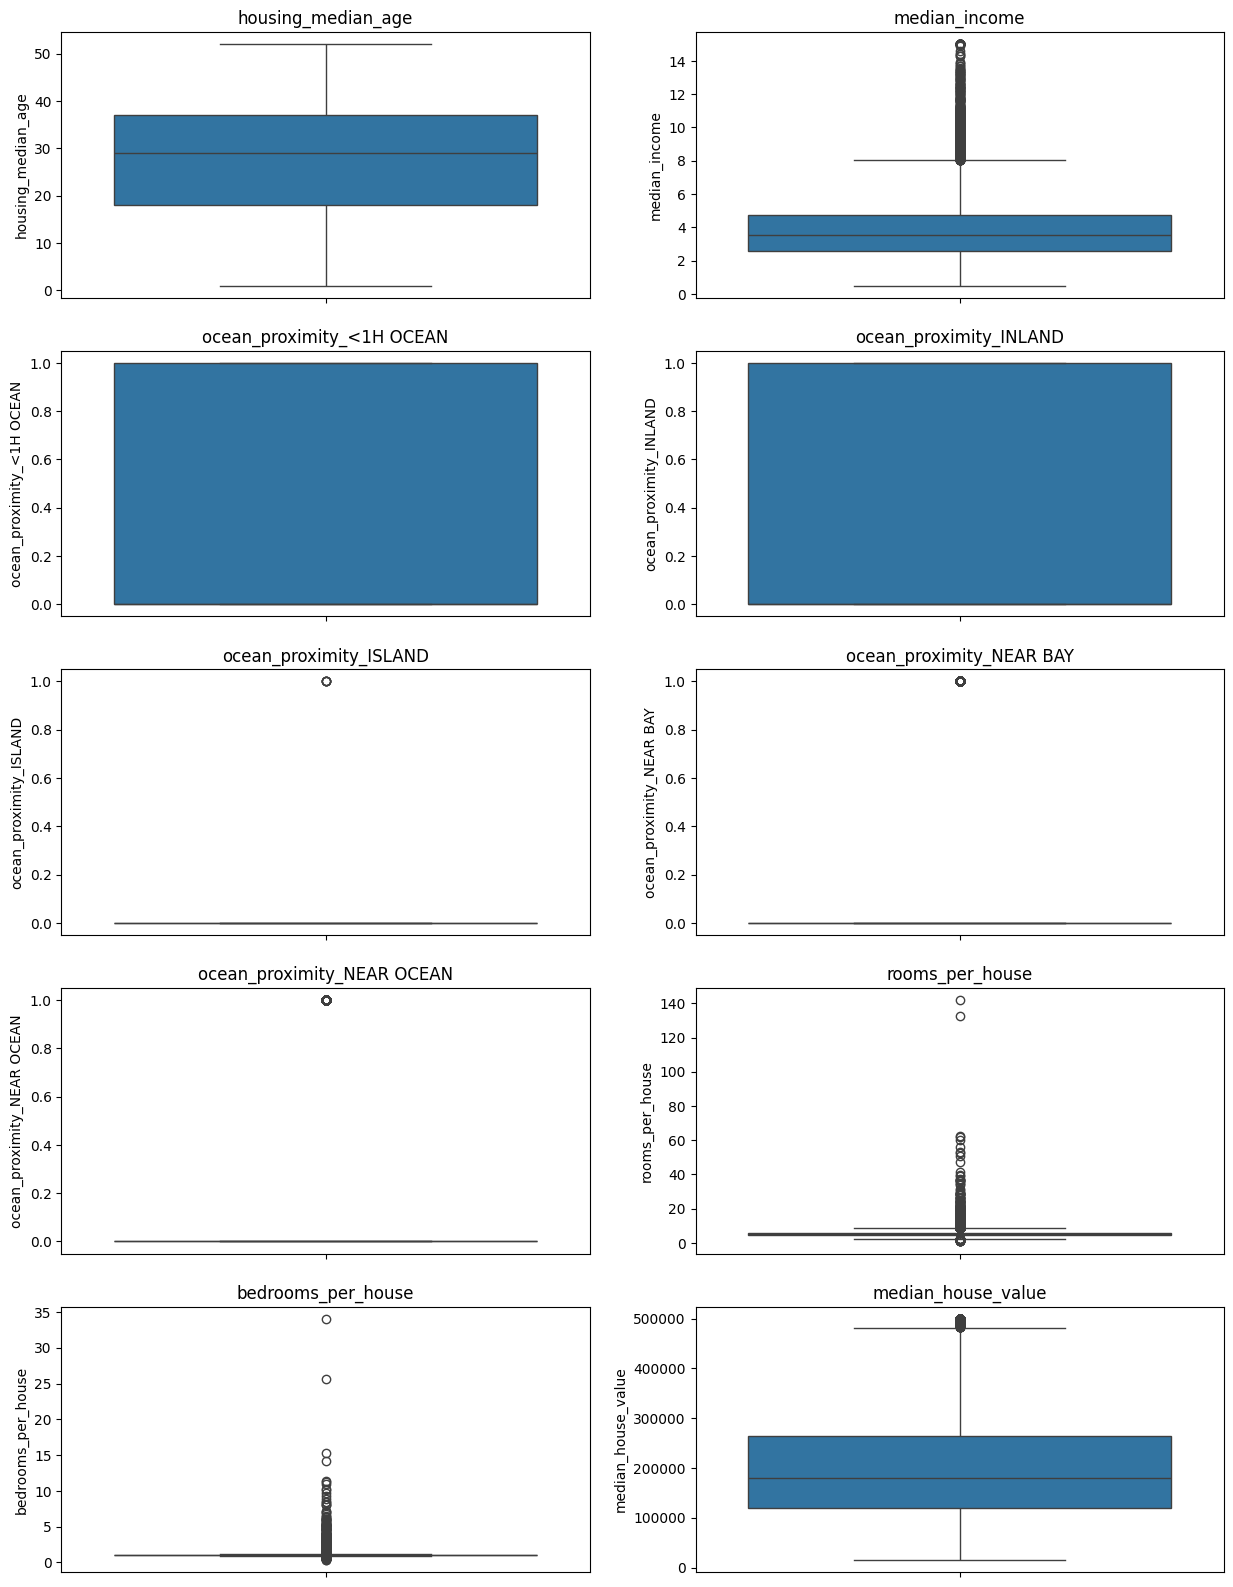

In [23]:
plt.subplots(5,2, figsize=(15,20))

for i, col in enumerate(df.columns):
    if col=='longitude' or col=='latitude':
        continue
    else:   
        plt.subplot(5,2, i-1)
        sns.boxplot(df[col])
        plt.title(f'{col}')

plt.savefig('../reports/feature_boxplots.png')

In [43]:
# bedrooms > 15  ---> outliers
# rooms > 60    ---> outliers

df.drop(df[df['bedrooms_per_house'] > 3].index, axis=0, inplace=True)
df.drop(df[df['rooms_per_house'] > 12].index, axis=0, inplace=True)
df.drop(df[df['median_income'] > 12].index, axis=0, inplace=True)

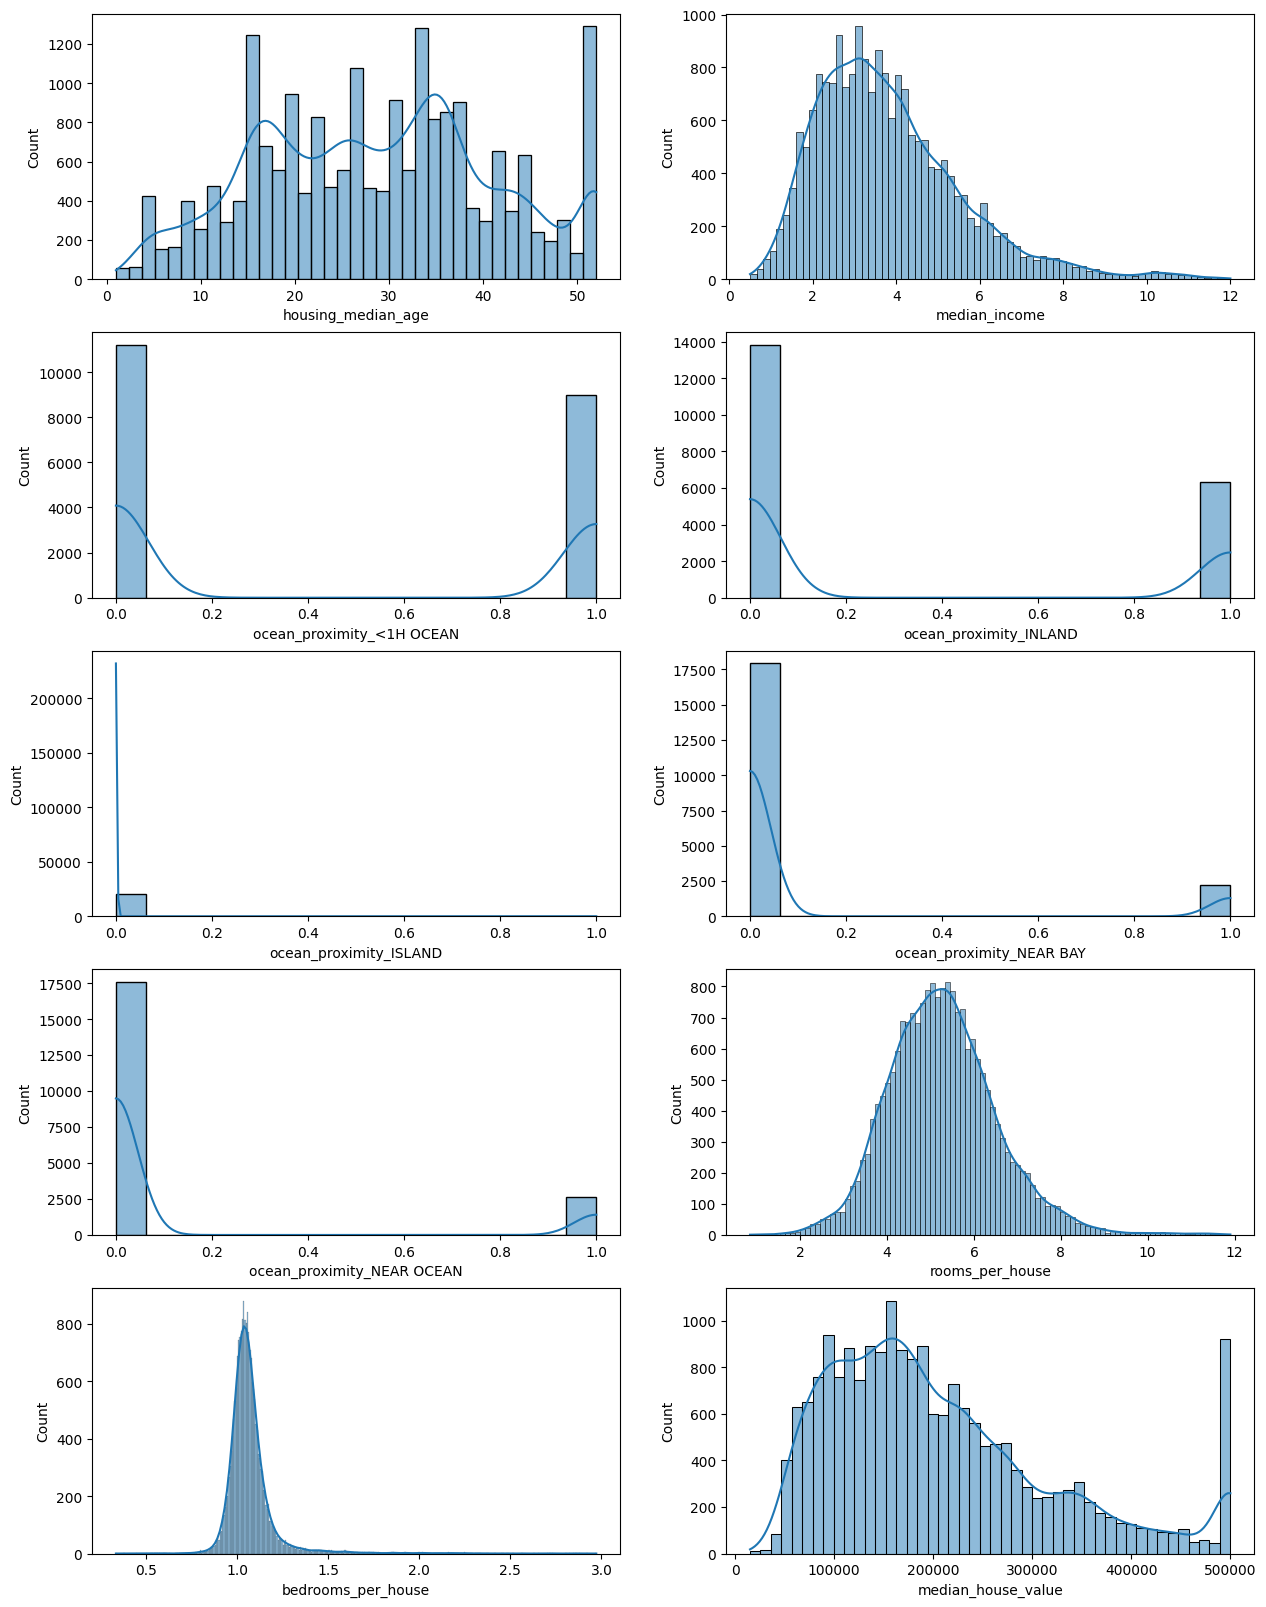

In [44]:
plt.subplots(5,2, figsize=(15,20))

for i, col in enumerate(df.columns):
    if col=='longitude' or col=='latitude':
        continue
    else:   
        plt.subplot(5,2, i-1)
        sns.histplot(df[col], kde=True)
        # plt.title(f'{col}')

plt.savefig('../reports/feature_histplots.png')

In [45]:
df.shape

(20175, 12)

## Feature Selection

In [47]:
X = df.drop(['median_house_value'], axis=1)
Y = df['median_house_value']

In [46]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, 
                                                    random_state=42, shuffle=True)

In [48]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X, Y, random_state=42, n_jobs=-1)
mi_df = pd.DataFrame({'Features': X.columns, 'Scores': mi_scores})

In [49]:
mi_df = mi_df.sort_values(by='Scores', ascending=False)

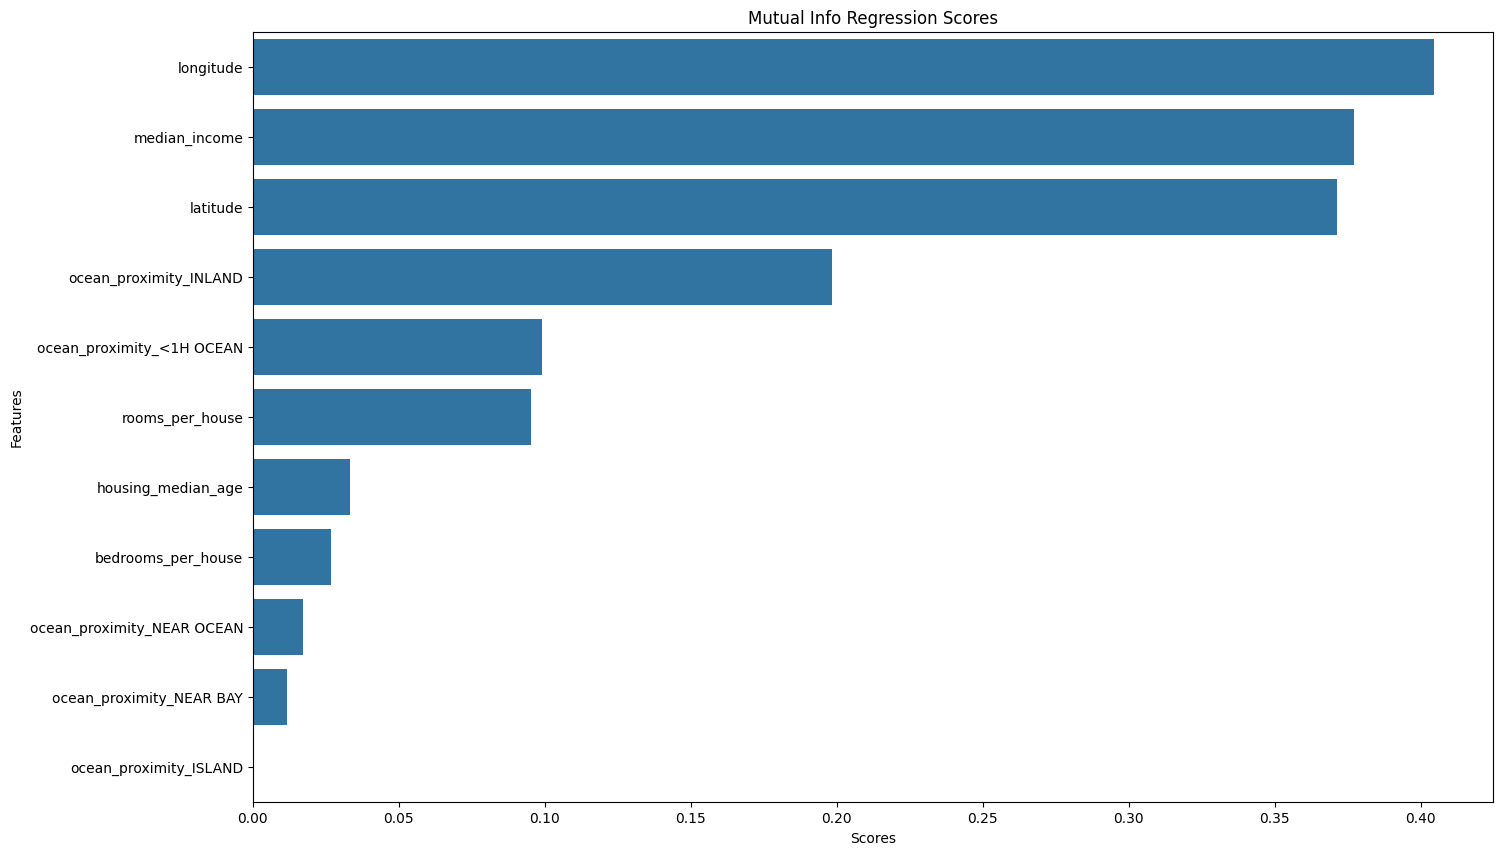

In [50]:
plt.figure(figsize=(16, 10))
plt.title('Mutual Info Regression Scores')
sns.barplot(mi_df, x=mi_df['Scores'], y=mi_df['Features'])

plt.savefig('../reports/mi_scores.png')

In [114]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

In [200]:
# estimator_ridge = Ridge(alpha=2.0, max_iter=1000, random_state=42)
estimator_dtr = DecisionTreeRegressor(max_depth=5, min_samples_split=40, 
                                      min_samples_leaf=20, random_state=42)

In [116]:
# rfecv_ridge = RFECV(estimator=estimator_ridge, step=1, min_features_to_select=5, cv=10, 
#                  verbose=1, n_jobs=5, scoring='neg_median_absolute_error')
# rfecv_ridge.set_output(transform='pandas')

RFECV(cv=10, estimator=Ridge(alpha=2.0, max_iter=1000, random_state=42),
      min_features_to_select=5, n_jobs=5, scoring='neg_median_absolute_error',
      verbose=1)

In [205]:
rfecv_dtr = RFECV(estimator=estimator_dtr, step=1, min_features_to_select=6, cv=10, 
                  verbose=1, n_jobs=5, scoring='neg_median_absolute_error')
rfecv_dtr.set_output(transform='pandas')

RFECV(cv=10,
      estimator=DecisionTreeRegressor(max_depth=5, min_samples_leaf=20,
                                      min_samples_split=40, random_state=42),
      min_features_to_select=6, n_jobs=5, scoring='neg_median_absolute_error',
      verbose=1)

In [118]:
from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()

In [119]:
# x_train_scaled = scaler.fit_transform(x_train)

In [120]:
# rfecv_ridge.fit(x_train_scaled, y_train)

RFECV(cv=10, estimator=Ridge(alpha=2.0, max_iter=1000, random_state=42),
      min_features_to_select=5, n_jobs=5, scoring='neg_median_absolute_error',
      verbose=1)

In [194]:
x_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'rooms_per_house', 'bedrooms_per_house'],
      dtype='object')

In [122]:
# rfecv_ridge.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [123]:
# rfecv_ridge.n_features_

np.int64(11)

In [206]:
rfecv_dtr.fit(x_train, y_train)

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


RFECV(cv=10,
      estimator=DecisionTreeRegressor(max_depth=5, min_samples_leaf=20,
                                      min_samples_split=40, random_state=42),
      min_features_to_select=6, n_jobs=5, scoring='neg_median_absolute_error',
      verbose=1)

In [207]:
rfecv_dtr.ranking_

array([1, 1, 1, 1, 2, 1, 5, 4, 3, 1, 1])

In [208]:
rfecv_dtr.n_features_

np.int64(7)

In [286]:
x_train_new = rfecv_dtr.transform(x_train)

In [210]:
from joblib import dump

In [273]:
# with open('../models/RFECV_fitted.joblib', 'wb') as f:
#     dump(rfecv_dtr, f)

In [287]:
rob_scaler = RobustScaler()

In [288]:
rob_scaler.set_output(transform='pandas')

RobustScaler()

In [289]:
x_train_new_scaled = rob_scaler.fit_transform(x_train_new)

In [293]:
# with open('../models/RobustScaler_fitted.joblib', 'wb') as f:
#     dump(rob_scaler, f)

In [294]:
x_test_new = rfecv_dtr.transform(x_test)

In [295]:
x_test_new_scaled = rob_scaler.transform(x_test_new)

## Models Training

In [217]:
x_train_new_scaled.shape

(14122, 7)

In [232]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

In [245]:
rfr = RandomForestRegressor(n_estimators=150, criterion='squared_error', max_depth=15, 
                            min_samples_split=10, min_samples_leaf=5, max_features=1.0, 
                            bootstrap=True, oob_score=True, n_jobs=5, random_state=42)
lr = LinearRegression(n_jobs=5)
knr = KNeighborsRegressor( n_neighbors=10, weights='distance', algorithm='auto', leaf_size=30, 
                           p=3, metric='minkowski', n_jobs=5)
hgbr = HistGradientBoostingRegressor(max_iter=300, validation_fraction=0.25, 
                                     max_depth=10, random_state=42)

In [246]:
rfr.fit(x_train_new_scaled, y_train)
lr.fit(x_train_new_scaled, y_train)
knr.fit(x_train_new_scaled, y_train)
hgbr.fit(x_train_new_scaled, y_train)

HistGradientBoostingRegressor(max_depth=10, max_iter=300, random_state=42,
                              validation_fraction=0.25)

In [247]:
rfr_preds = rfr.predict(x_test_new_scaled)
lr_preds = lr.predict(x_test_new_scaled)
knr_preds = knr.predict(x_test_new_scaled)
hgbr_preds = hgbr.predict(x_test_new_scaled)

In [248]:
from sklearn.metrics import r2_score, mean_absolute_error

In [249]:
print(f'RFR Accuracy: {round(r2_score(y_test, rfr_preds)* 100, 2)} %')
print(f'LR Accuracy: {round(r2_score(y_test, lr_preds)* 100, 2)} %')
print(f'KNR Accuracy: {round(r2_score(y_test, knr_preds)* 100, 2)} %')
print(f'HGBR Accuracy: {round(r2_score(y_test, hgbr_preds)* 100, 2)} %')

RFR Accuracy: 82.62 %
LR Accuracy: 64.77 %
KNR Accuracy: 67.73 %
HGBR Accuracy: 83.67 %


In [250]:
mean_absolute_error(y_test, rfr_preds)

31899.95767050782

In [251]:
print(f'RFR MAE: {round(mean_absolute_error(y_test, rfr_preds), 4)}')
print(f'LR MAE: {round(mean_absolute_error(y_test, lr_preds), 4)}')
print(f'KNR MAE: {round(mean_absolute_error(y_test, knr_preds), 4)}')
print(f'HGBR MAE: {round(mean_absolute_error(y_test, hgbr_preds), 4)}')

RFR MAE: 31899.9577
LR MAE: 49703.0365
KNR MAE: 45071.8833
HGBR MAE: 31430.4911


In [230]:
pipeline = Pipeline([('regressor', RandomForestRegressor())])

In [238]:
par_grid = [
    {'regressor': [RandomForestRegressor(n_estimators=150, criterion='squared_error', 
                                         max_depth=15, min_samples_split=10, min_samples_leaf=5, 
                                         max_features=1.0, bootstrap=True, oob_score=True, 
                                         n_jobs=5, random_state=42)], 
    'regressor__n_estimators': [100, 200, 250], 
     'regressor__max_depth': [5, 10, 20], 
     'regressor__min_samples_split': [20, 30, 40], 
     'regressor__min_samples_leaf': [10, 15, 20]    
    },
    {'regressor': [HistGradientBoostingRegressor(max_iter=200, validation_fraction=0.25, 
                                                 max_depth=15, random_state=42)],
    'regressor__max_iter': [100, 200, 300], 
    'regressor__learning_rate': [0.01, 0.1, 0.2], 
     'regressor__max_depth': [5, 10, 15, 20]
    }
]

In [239]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=par_grid, cv=5, n_jobs=5, 
                           scoring='neg_median_absolute_error', verbose=1, return_train_score=True)

In [240]:
grid_search.fit(x_train_new_scaled, np.ravel(y_train))

Fitting 5 folds for each of 117 candidates, totalling 585 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('regressor', RandomForestRegressor())]),
             n_jobs=5,
             param_grid=[{'regressor': [RandomForestRegressor(max_depth=15,
                                                              min_samples_leaf=5,
                                                              min_samples_split=10,
                                                              n_estimators=150,
                                                              n_jobs=5,
                                                              oob_score=True,
                                                              random_state=42)],
                          'regressor__max_depth': [5, 10, 20],
                          'regressor__min_samples_leaf': [10, 15, 20],
                          'regressor__min_samples...20, 30, 40],
                          'regressor__n_estimators': [100, 200, 250]},
                         {'regressor': [HistGradientBoostingRegressor(max_depth=15,
                                                                      max_iter=200,
                                                                      random_state=42,
                                                                      validation_fraction=0.25)],
                          'regressor__learning_rate': [0.01, 0.1, 0.2],
                          'regressor__max_depth': [5, 10, 15, 20],
                          'regressor__max_iter': [100, 200, 300]}],
             return_train_score=True, scoring='neg_median_absolute_error',
             verbose=1)

In [242]:
best_model = grid_search.best_estimator_
print(best_model)

Pipeline(steps=[('regressor',
                 HistGradientBoostingRegressor(max_depth=10, max_iter=300,
                                               random_state=42,
                                               validation_fraction=0.25))])


In [253]:
print(f'Accuracy: {round(best_model.score(x_test_new_scaled, y_test)*100, 2)}%')

Accuracy: 83.67%


In [270]:
# from joblib import dump

# with open('../models/RandomForestRegressor.joblib', 'wb') as f:
#     dump(rfr, f)

# with open('../models/HistGradientBoostingRegressor.joblib', 'wb') as f:
#     dump(hgbr, f)

## Plotting Results

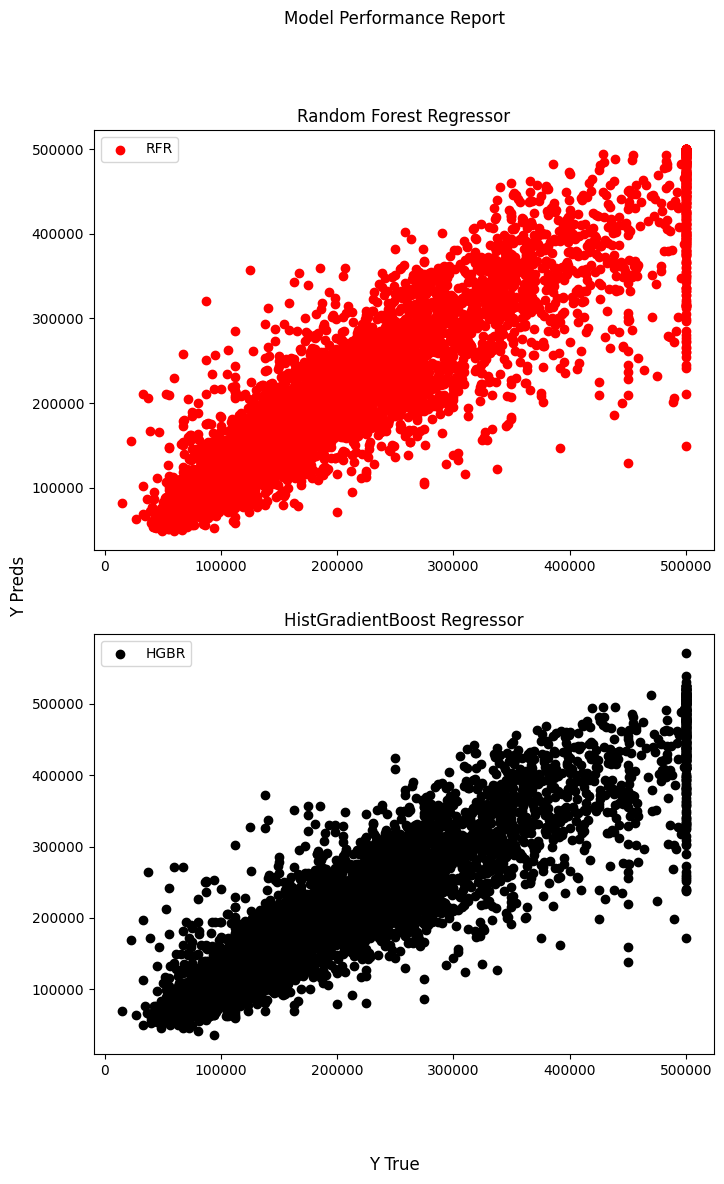

In [272]:
fig, axs = plt.subplots(2, figsize=(8, 12))
fig.suptitle('Model Performance Report')
fig.supxlabel('Y True')
fig.supylabel('Y Preds')

# rfr algo
axs[0].scatter(y_test, rfr_preds, color='red', label='RFR')
axs[0].set_title('Random Forest Regressor')
axs[0].legend()
# axs[0].set_aspect('equal', adjustable='datalim')

# ada_reg algo
axs[1].scatter(y_test, hgbr_preds, color='black', label='HGBR')
axs[1].set_title('HistGradientBoost Regressor')
axs[1].legend()
# axs[1].set_aspect('equal', adjustable='datalim')

plt.show()
# plt.savefig('../reports/model_performances_report.png')

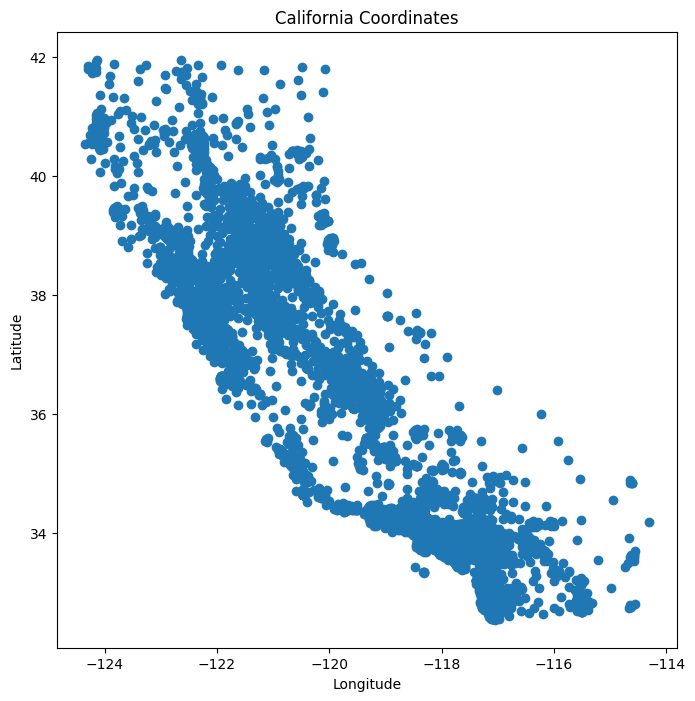

In [265]:
# Map of Califirnia Coordinates

plt.figure(figsize=(8,8))
plt.title('California Coordinates')
plt.scatter(df['longitude'], df['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Generate Inference Data

In [280]:
from random import choice, uniform

In [281]:
x_train_new.columns

Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'ocean_proximity_INLAND', 'rooms_per_house', 'bedrooms_per_house'],
      dtype='object')

In [283]:
from collections import defaultdict
inf_data_ranges = defaultdict(tuple)
for col in x_train_new.columns:
    inf_data_ranges[col] = (min(x_train_new[col]), max(x_train_new[col]))

In [284]:
inf_data_ranges

defaultdict(tuple,
            {'longitude': (-124.35, -114.31),
             'latitude': (32.54, 41.95),
             'housing_median_age': (1.0, 52.0),
             'median_income': (0.4999, 11.9993),
             'ocean_proximity_INLAND': (0, 1),
             'rooms_per_house': (0.8888888888888888, 11.901869158878505),
             'bedrooms_per_house': (0.3333333333333333, 2.971631205673759)})